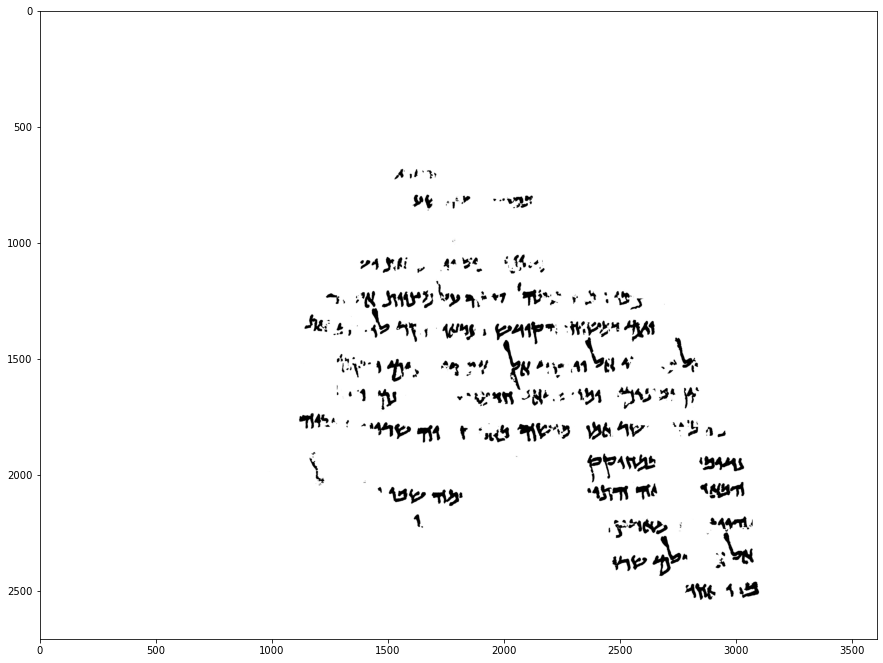

In [188]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import numpy as np


easy_path = r'/Users/joostfranssen/Documents/Study/MSc_AI/Year_1/Semester_2B/HWR/image-data/P168-Fg016-R-C01-R01-binarized.jpg'
hard_path = r'/Users/joostfranssen/Documents/Study/MSc_AI/Year_1/Semester_2B/HWR/image-data/P22-Fg008-R-C01-R01-binarized.jpg' 
huge_scroll = r'/Users/joostfranssen/Documents/Study/MSc_AI/Year_1/Semester_2B/HWR/image-data/P344-Fg001-R-C01-R01-binarized.jpg'
half_sentences_scroll = r'/Users/joostfranssen/Documents/Study/MSc_AI/Year_1/Semester_2B/HWR/image-data/P106-Fg002-R-C01-R01-binarized.jpg'
divided_scroll = r'/Users/joostfranssen/Documents/Study/MSc_AI/Year_1/Semester_2B/HWR/image-data/P423-1-Fg002-R-C01-R01-binarized.jpg' 
curly_scroll = r'/Users/joostfranssen/Documents/Study/MSc_AI/Year_1/Semester_2B/HWR/image-data/P123-Fg002-R-C01-R01-binarized.jpg' 
vague_scroll = r'/Users/joostfranssen/Documents/Study/MSc_AI/Year_1/Semester_2B/HWR/image-data/P166-Fg007-R-C01-R01-binarized.jpg'

image2 = cv2.imread(half_sentences_scroll)
img_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.axis()
plt.imshow(img_gray, cmap="gray")
plt.show()



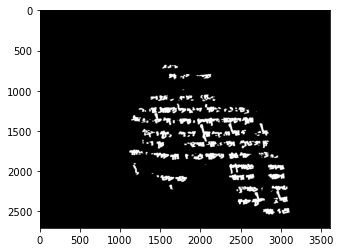

In [189]:
#maybe use this instead of the other gray image becaus here the small things are removed and we can find a better path i think.

def thresholding(image):
    img_gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img_gray);

#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

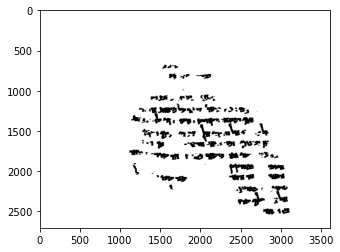

In [190]:
invert = cv2.bitwise_not(dilated2)
plt.imshow(invert, cmap='gray');

In [191]:
img = invert

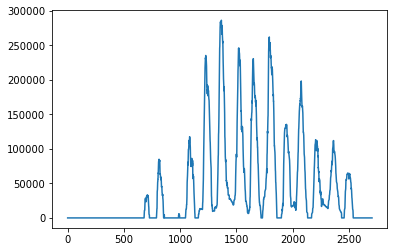

In [192]:
from skimage.filters import sobel
import numpy as np
import matplotlib.pyplot as plt

def horizontal_projections(sobel_image):
    return np.sum(sobel_image, axis=1)  


#function Sobel() to calculate the derivatives from an image.
#Changed dilated2 
sobel_image = sobel(img)
hpp = horizontal_projections(dilated2)
plt.plot(hpp)
plt.show()

23842


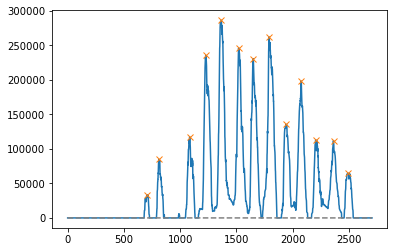

In [193]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

minimum_peak = int((np.max(hpp)-np.min(hpp))/12)
print(minimum_peak)
peaks, _ = find_peaks(hpp, height=minimum_peak, distance=100)
plt.plot(hpp)
plt.plot(peaks, hpp[peaks], "x")
plt.plot(np.zeros_like(hpp), "--", color="gray")
plt.show()

In [194]:
len(peaks)

13

[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 0], [67, 0], [68, 0], [69, 0], [70, 0], [71, 0], [72, 0], [73, 0], [74, 0], [75, 0], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 0], [91, 0], [92, 0], [93, 0], [94, 0], [95, 0], [96, 0], [97, 0], [98, 0], [99, 0], [100, 0], [101, 0], [102, 0], [103, 0], [104, 0], [105, 0], [106, 0], [107, 0], [108, 0], [109, 0], [110, 0],

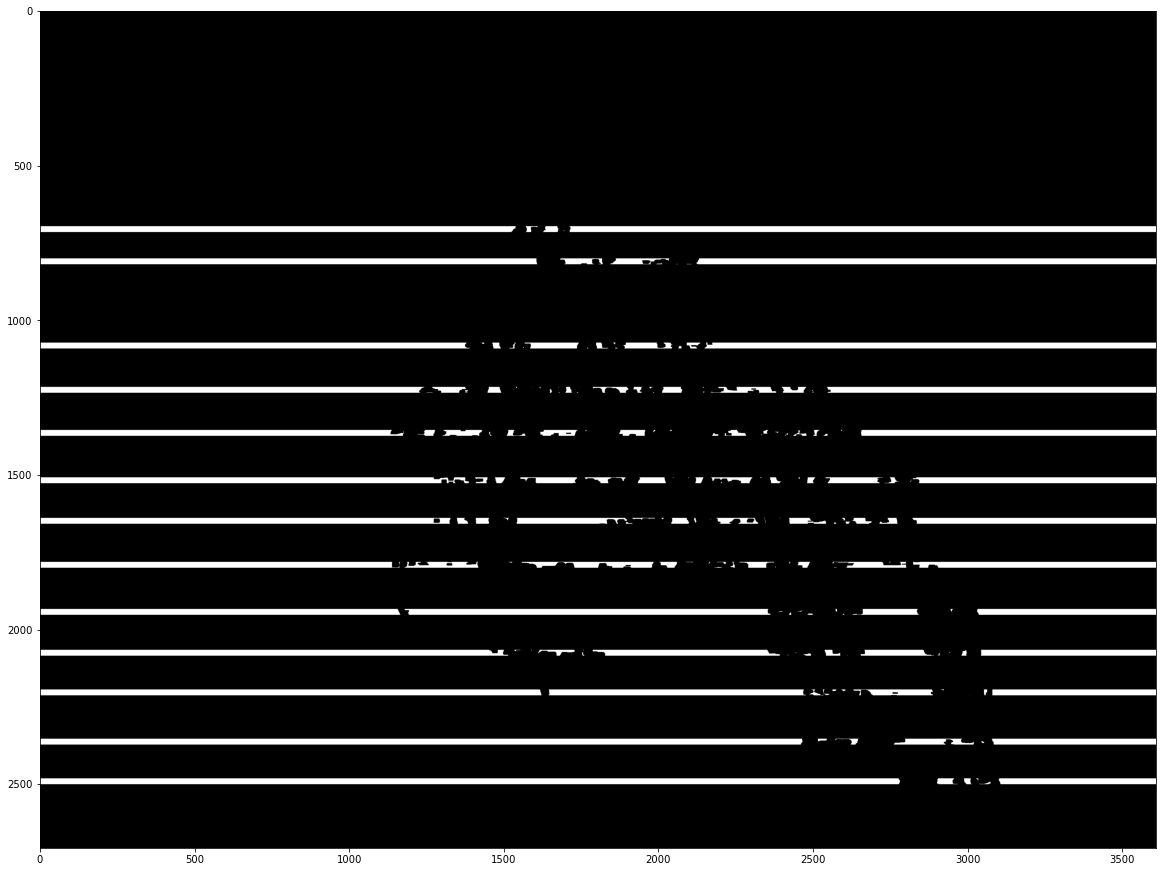

In [195]:
#find the midway where we can make a threshold and extract the peaks regions
#divider parameter value is used to threshold the peak values from non peak values.
def find_not_peak_regions(hpp):
    not_peaks = []
    not_peaks_index = []
    count = 0
    x = 0
    line_size = 10
    for i, hppv in enumerate(hpp):
        if x > (len(peaks) - 1):
            not_peaks.append([i, hppv])
        elif i < (peaks[x] - line_size) or i > (peaks[x] + line_size):
            not_peaks.append([i, hppv])
        else:
            count += 1
            if count == ((line_size*2) - 1):
                x += 1
                count = 0
                print(x)
                print(count)
    return not_peaks

print(not_peaks)

not_peaks = find_not_peak_regions(hpp)

not_peaks_index = np.array(not_peaks)[:,0].astype(int)



segmented_img = np.copy(img)
r,c = segmented_img.shape
for ri in range(r):
    if ri in not_peaks_index:
        segmented_img[ri, :] = 0
        
plt.figure(figsize=(20,20))
plt.imshow(segmented_img, cmap="gray")
plt.show()

In [196]:
# #find the midway where we can make a threshold and extract the peaks regions
# #divider parameter value is used to threshold the peak values from non peak values.
# def find_not_peak_regions(hpp, divider=3):
#     threshold = (np.max(hpp)-np.min(hpp))/divider
#     not_peaks = []
#     not_peaks_index = []
#     for i, hppv in enumerate(hpp):
#         if hppv < threshold:
#             not_peaks.append([i, hppv])
#     return not_peaks

# not_peaks = find_not_peak_regions(hpp)

# not_peaks_index = np.array(not_peaks)[:,0].astype(int)



# segmented_img = np.copy(img)
# r,c = segmented_img.shape
# for ri in range(r):
#     if ri in not_peaks_index:
#         segmented_img[ri, :] = 0
        
# plt.figure(figsize=(20,20))
# plt.imshow(segmented_img, cmap="gray")
# plt.show()

In [197]:
#group the peaks into walking windows
#Hpp_clusters = the black parts in the image
def get_hpp_walking_regions(peaks_index):
    hpp_clusters = []
    cluster = []
    for index, value in enumerate(peaks_index):
        cluster.append(value)

        if index < len(peaks_index)-1 and peaks_index[index+1] - value > 1:
            hpp_clusters.append(cluster)
            cluster = []

        #get the last cluster
        if index == len(peaks_index)-1:
            hpp_clusters.append(cluster)
            cluster = []
            
    return hpp_clusters

hpp_clusters = get_hpp_walking_regions(not_peaks_index)

In [198]:
smallest = 100
for i in range(len(hpp_clusters)):
    size = hpp_clusters[i][-1] - hpp_clusters[i][0]
    print(size)
    if size < smallest:
        smallest = size

print(smallest)

697
84
252
123
119
133
111
122
132
112
108
139
108
205
84


In [199]:
improved_clusters = []

for i in range(len(hpp_clusters) -1):
    diff = hpp_clusters[i+1][0] - hpp_clusters[i][-1]
    print(diff)
#     if diff < 10:
#         new_cluster = []
#         new_cluster_size = int(hpp_clusters[i+1][-1] - hpp_clusters[i][0])
#         print("new clusters size: "+ str(new_cluster_size))
#         for x in range(new_cluster_size):
#             new_cluster.append(int(hpp_clusters[i][0])+ x)
        
#         improved_clusters.append(new_cluster)
#     else:
#         improved_clusters.append(hpp_clusters[i])



20
20
20
20
20
20
20
20
20
20
20
20
20


In [200]:
#Delete small walking regions that do get in by accident
improved_clusters = []
for i in range(len(hpp_clusters)):
    if (hpp_clusters[i][-1] - hpp_clusters[i][0]) > 12:
        improved_clusters.append(hpp_clusters[i])

hpp_clusters = improved_clusters


In [201]:
#a star path planning algorithm 
from heapq import *

def heuristic(a, b):
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

def astar(array, start, goal):
    #print("start: " + str(start))
    #print("end: " + str(goal))
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heappush(oheap, (fscore[start], start))
    
    while oheap:

        current = heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heappush(oheap, (fscore[neighbor], neighbor))
                
    return []

In [202]:
#Scan the paths to see if there are any blockers.
from skimage.filters import threshold_otsu
from skimage.util import invert

def get_binary(img):
    mean = np.mean(img)
    if mean == 0.0 or mean == 1.0:
        return img

    thresh = threshold_otsu(img)
    binary = img <= thresh
    binary = binary*1
    return binary

def path_exists(window_image):
    #very basic check first then proceed to A* check
    if 0 in horizontal_projections(window_image):
        return True
    
    padded_window = np.zeros((window_image.shape[0],1))
    world_map = np.hstack((padded_window, np.hstack((window_image,padded_window)) ) )
    path = np.array(astar(world_map, (int(world_map.shape[0]/2), 0), (int(world_map.shape[0]/2), world_map.shape[1])))
    if len(path) > 0:
        return True
    
    return False

def get_road_block_regions(nmap):
    road_blocks = []
    needtobreak = False
    print(nmap.shape[1])
    
    #nmap.shape[1] is the amount of x values we have. The length from left to right
    for col in range(nmap.shape[1]):
        start = col
        end = col+20
        if end > nmap.shape[1]-1:
            end = nmap.shape[1]-1
            needtobreak = True

        if path_exists(nmap[:, start:end]) == False:
            road_blocks.append(col)

        if needtobreak == True:
            break
    #road_blocks = the x values of were the road_block is. not in which cluster but at what x values we can find the road blocks
    print("nmap: " + str(nmap.shape[0]))
    print(road_blocks)
    return road_blocks

def group_the_road_blocks(road_blocks):
    #group the road blocks
    road_blocks_cluster_groups = []
    road_blocks_cluster = []
    size = len(road_blocks)
    for index, value in enumerate(road_blocks):
        road_blocks_cluster.append(value)
        if index < size-1 and (road_blocks[index+1] - road_blocks[index]) > 1:
            road_blocks_cluster_groups.append([road_blocks_cluster[0], road_blocks_cluster[len(road_blocks_cluster)-1]])
            road_blocks_cluster = []

        if index == size-1 and len(road_blocks_cluster) > 0:
            road_blocks_cluster_groups.append([road_blocks_cluster[0], road_blocks_cluster[len(road_blocks_cluster)-1]])
            road_blocks_cluster = []

    return road_blocks_cluster_groups

binary_image = get_binary(img)

for cluster_of_interest in hpp_clusters:
    nmap = binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:]
    road_blocks = get_road_block_regions(nmap)
    road_blocks_cluster_groups = group_the_road_blocks(road_blocks)
    #create the doorways
    #remove the road blocks such that the path finder can do a better job. 
    for index, road_blocks in enumerate(road_blocks_cluster_groups):
        #print("second loop")
        if nmap.shape[0] == 0:
            continue
        else:
            window_image = nmap[:, road_blocks[0]: road_blocks[1]+10]
            binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:][:, road_blocks[0]: road_blocks[1]+10][int(window_image.shape[0]/2),:] *= 0

3608
nmap: 697
[]
3608
nmap: 84
[]
3608
nmap: 252
[]
3608
nmap: 123
[]
3608
nmap: 119
[]
3608
nmap: 133
[]
3608
nmap: 111
[]
3608
nmap: 122
[]
3608
nmap: 132
[]
3608
nmap: 112
[]
3608
nmap: 108
[]
3608
nmap: 139
[]
3608
nmap: 108
[]
3608
nmap: 205
[]


In [203]:
line_new = []
size_cluster = int(nmap.shape[0] /2)
for i in range(nmap.shape[1] -1):
    line_new.append([size_cluster, nmap.shape[1]-i -1])
    line = []
line_new = np.asarray(line_new)

In [204]:
line_new = np.asarray(line_new)

In [205]:
#now that everything is cleaner, its time to segment all the lines using the A* algorithm
line_segments = []
for i, cluster_of_interest in enumerate(hpp_clusters):
    nmap = binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:]
    #nmap.shape[0] = the size of the hpp_cluster by y values
    path = np.array(astar(nmap, (int(nmap.shape[0]/2), 0), (int(nmap.shape[0]/2), nmap.shape[1]-1)))
    #finding a path is impossible
    if path.shape[0] == 0:
        line_new = []
        size_cluster = int(nmap.shape[0] /2)
        for i in range(nmap.shape[1] -1):
            line_new.append([size_cluster, nmap.shape[1]-i -1])
            line = []
        line_new = np.asarray(line_new)
        print("offset_from_top: " + str(offset_from_top))
        offset_from_top = cluster_of_interest[0]
        line_new[:,0] += offset_from_top
        print("line: " + str(line_new))
        print("line[:,0]: " + str(line_new[:,0]))
        line_segments.append(line_new)
    else:
        print(nmap.shape[0])
        print(path.shape)
        print("Shape : "+str(np.shape(cluster_of_interest)))
        offset_from_top = cluster_of_interest[0]
        print("offset_from_top: " + str(offset_from_top))
        path[:,0] += offset_from_top
        print("path: " + str(path))
        print("path[:,0]: " + str(path[:,0]))
        line_segments.append(path)
        
    print()

697
(3607, 2)
Shape : (698,)
offset_from_top: 0
path: [[ 348 3607]
 [ 348 3606]
 [ 348 3605]
 ...
 [ 348    3]
 [ 348    2]
 [ 348    1]]
path[:,0]: [348 348 348 ... 348 348 348]

84
(3607, 2)
Shape : (85,)
offset_from_top: 717
path: [[ 759 3607]
 [ 759 3606]
 [ 759 3605]
 ...
 [ 759    3]
 [ 759    2]
 [ 759    1]]
path[:,0]: [759 759 759 ... 759 759 759]

252
(3607, 2)
Shape : (253,)
offset_from_top: 821
path: [[ 947 3607]
 [ 947 3606]
 [ 947 3605]
 ...
 [ 947    3]
 [ 947    2]
 [ 947    1]]
path[:,0]: [947 947 947 ... 947 947 947]

123
(3607, 2)
Shape : (124,)
offset_from_top: 1093
path: [[1154 3607]
 [1154 3606]
 [1154 3605]
 ...
 [1154    3]
 [1154    2]
 [1154    1]]
path[:,0]: [1154 1154 1154 ... 1154 1154 1154]

119
(3616, 2)
Shape : (120,)
offset_from_top: 1236
path: [[1295 3607]
 [1294 3606]
 [1294 3605]
 ...
 [1295    3]
 [1295    2]
 [1295    1]]
path[:,0]: [1295 1294 1294 ... 1295 1295 1295]

133
(3675, 2)
Shape : (134,)
offset_from_top: 1375
path: [[1441 3607]
 [1440 360

In [206]:
#print(line_segments)

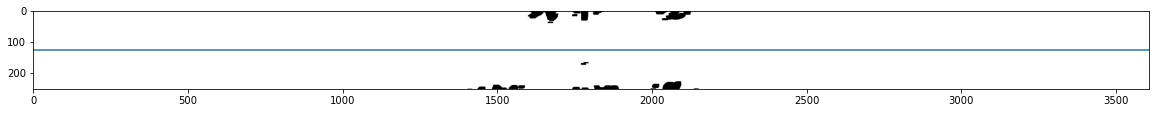

In [207]:
cluster_of_interest = hpp_clusters[2]
offset_from_top = cluster_of_interest[0]
nmap = binary_image[cluster_of_interest[0]:cluster_of_interest[len(cluster_of_interest)-1],:]
plt.figure(figsize=(20,20))
plt.imshow(invert(nmap), cmap="gray")

path = np.array(astar(nmap, (int(nmap.shape[0]/2), 0), (int(nmap.shape[0]/2),nmap.shape[1]-1)))
plt.plot(path[:,1], path[:,0])

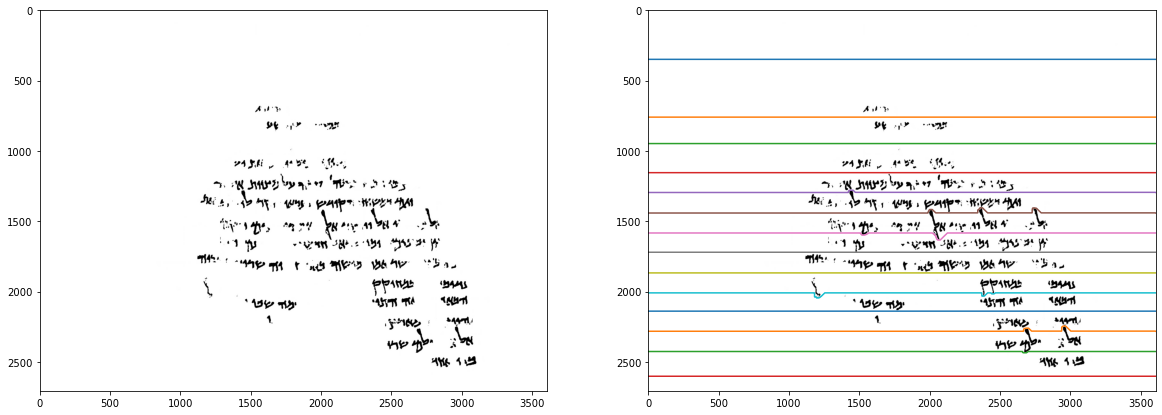

In [208]:
offset_from_top = cluster_of_interest[0]
fig, ax = plt.subplots(figsize=(20,10), ncols=2)
for path in line_segments:
    ax[1].plot((path[:,1]), path[:,0])
ax[1].axis()
ax[0].axis()
ax[1].imshow(image2, cmap="gray")
ax[0].imshow(image2, cmap="gray")

In [209]:
## add an extra line to the line segments array which represents the last bottom row on the image
#is this really necessary? 
last_bottom_row = np.flip(np.column_stack(((np.ones((image2.shape[1],))*image2.shape[0]), np.arange(image2.shape[1]))).astype(int), axis=0)
line_segments.append(last_bottom_row)

(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)
(2706, 3608)


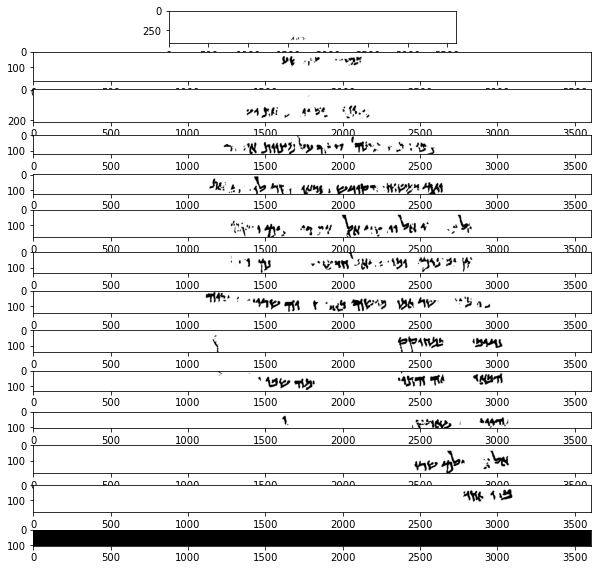

In [210]:
line_images = []
def extract_line_from_image(img, lower_line, upper_line):
    lower_boundary = np.min(lower_line[:, 0])
    upper_boundary = np.min(upper_line[:, 0])
    img_copy = np.copy(img)
    print(img_copy.shape)
    r, c = img_copy.shape
    for index in range(c-1):
        img_copy[0:lower_line[index, 0], index] = 255
        img_copy[upper_line[index, 0]:r, index] = 255
    
    return img_copy[lower_boundary:upper_boundary, :]



line_count = len(line_segments)
fig, ax = plt.subplots(figsize=(10,10), nrows=line_count-1)
for line_index in range(line_count-1):
    line_image = extract_line_from_image(img_gray, line_segments[line_index], line_segments[line_index+1])
    line_images.append(line_image)
    ax[line_index].imshow(line_image, cmap="gray")

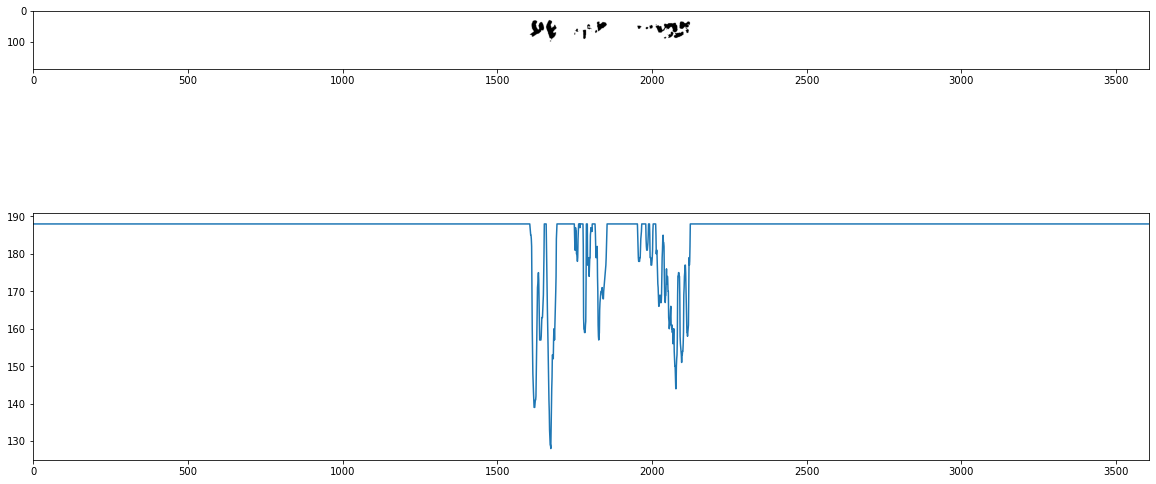

In [211]:
from skimage.filters import threshold_otsu

#binarize the image, guassian blur will remove any noise in the image
first_line = line_images[1]
thresh = threshold_otsu(first_line)
binary = first_line > thresh

# find the vertical projection by adding up the values of all pixels along rows
vertical_projection = np.sum(binary, axis=0)

# plot the vertical projects
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
plt.xlim(0, first_line.shape[1])
ax[0].imshow(binary, cmap="gray")
ax[1].plot(vertical_projection)

In [212]:
height = first_line.shape[0]

## we will go through the vertical projections and 
## find the sequence of consecutive white spaces in the image
whitespace_lengths = []
whitespace = 0
for vp in vertical_projection:
    if vp == height:
        whitespace = whitespace + 1
    elif vp != height:
        if whitespace != 0:
            whitespace_lengths.append(whitespace)
        whitespace = 0 # reset whitepsace counter. 

print("whitespaces:", whitespace_lengths)
avg_white_space_length = np.mean(whitespace_lengths)
print("average whitespace lenght:", avg_white_space_length)

whitespaces: [1606, 7, 57, 4, 10, 4, 10, 99, 14, 4, 9]
average whitespace lenght: 165.8181818181818


In [213]:
## find index of whitespaces which are actually long spaces using the avg_white_space_length
whitespace_length = 0
divider_indexes = []
for index, vp in enumerate(vertical_projection):
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 and whitespace_length > avg_white_space_length:
            divider_indexes.append(index-int(whitespace_length/2))
            whitespace_length = 0 # reset it
            
print(divider_indexes)

[803, 1859]


In [214]:
# lets create the block of words from divider_indexes
divider_indexes = np.array(divider_indexes)
dividers = np.column_stack((divider_indexes[:-1],divider_indexes[1:]))

TypeError: 'AxesSubplot' object is not subscriptable

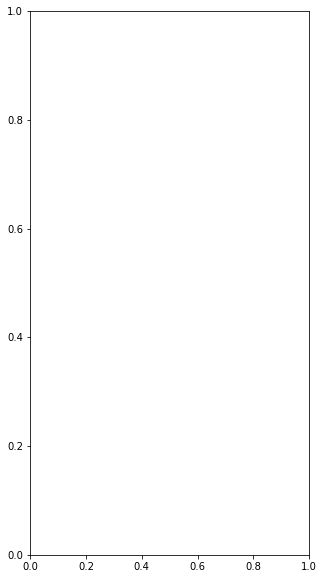

In [215]:
# now plot the findings
fig, ax = plt.subplots(nrows=len(dividers), figsize=(5,10))
for index, window in enumerate(dividers):
    ax[index].axis("off")
    ax[index].imshow(first_line[:,window[0]:window[1]], cmap="gray")